# Python Tips

## 擬似乱数を生成：random

In [14]:
import random
seed = 1

random_instance = random.Random(seed)
for i in range(10):
    print(random_instance.choice((True, False)))

True
True
False
True
False
False
False
False
True
True


In [119]:
for i in range(10):
    # Random float x, 0.0 <= x < 1.0
    print(random_instance.random())

0.009204938554384978
0.8812338589221554
0.6864838541790798
0.9690406502940995
0.7258526014465152
0.5276294143623982
0.7637009951314895
0.9391670189485866
0.5528595762929651
0.34570041470875246


## ラムダ式

In [44]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)
print(f(0))
print(f(1))

42
43


In [47]:
lambda1 = lambda x: x + 42
print(type(lambda1))
print(lambda1(1))

<class 'function'>
43


In [1]:
#lambda1 = lambda x: x + 42
def add(x):
    return x + 42
add(1)

43

In [48]:
pairs = [(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
pairs

[(4, 'four'), (1, 'one'), (3, 'three'), (2, 'two')]

## 2重内包表記

In [3]:
# for i1 in l1:
#     for i2 in l2:
#         all_l.append(i1+i2)
l1 = ["a1", "a2", "a3"]
l2 = ["b1", "b2", "b3"]
all_l = [i1+i2 for i1 in l1 for i2 in l2]
all_l

['a1b1', 'a1b2', 'a1b3', 'a2b1', 'a2b2', 'a2b3', 'a3b1', 'a3b2', 'a3b3']

In [4]:
[i1 for i1 in l1 for i2 in l2]

['a1', 'a1', 'a1', 'a2', 'a2', 'a2', 'a3', 'a3', 'a3']

In [9]:
l3 = ["c1", "c2", "c3"]
all_l = [i1+i2+i3 for i1 in l1 for i2 in l2 for i3 in l3]
all_l

['a1b1c1',
 'a1b1c2',
 'a1b1c3',
 'a1b2c1',
 'a1b2c2',
 'a1b2c3',
 'a1b3c1',
 'a1b3c2',
 'a1b3c3',
 'a2b1c1',
 'a2b1c2',
 'a2b1c3',
 'a2b2c1',
 'a2b2c2',
 'a2b2c3',
 'a2b3c1',
 'a2b3c2',
 'a2b3c3',
 'a3b1c1',
 'a3b1c2',
 'a3b1c3',
 'a3b2c1',
 'a3b2c2',
 'a3b2c3',
 'a3b3c1',
 'a3b3c2',
 'a3b3c3']

## 高階関数

関数を引数、戻り値として扱う関数

In [43]:
#map　全要素に適応
list(map(lambda x: x+"!", l1))

['a1!', 'a2!', 'a3!']

In [11]:
#filter 絞り込む
list(filter(lambda x: x == "a1", l1))

['a1']

In [68]:
filter1 = lambda x: x if x == "a1" or x == "a2" else ""
list(filter(filter1, l1))

['a1', 'a2']

In [84]:
filter1 = lambda x: x if x == "a1" or x == "a2" else ""
add_str1 = lambda x: x+"!"
filtered_l = list(filter(filter1, l1))
maped_l = list(map(add_str1, filtered_l))
maped_l

['a1!', 'a2!']

In [14]:
#reduce まとめちゃう
#リストの合計
from functools import reduce
nums = [3, 4, 6, -7, 0, 1]
print(reduce(lambda x, y: x +y, nums, 0))


7


In [21]:
#要素数
from functools import reduce
nums = [3, 4, 6, -7, 0, 1]
print(reduce(lambda x, y: x +1, nums, 0))

6


In [96]:
reduce1 = lambda x,y: x + " | "+y+ "  ,"
print(all_l)
print(reduce(reduce1, all_l))

['a1b1', 'a1b2', 'a1b3', 'a2b1', 'a2b2', 'a2b3', 'a3b1', 'a3b2', 'a3b3']
a1b1 | a1b2  , | a1b3  , | a2b1  , | a2b2  , | a2b3  , | a3b1  , | a3b2  , | a3b3  ,


ありがちな作業として、重み付けされた確率の random.choice() を作ることがあります。

重み付けが整数比率なら、簡単なテクニックはサンプル母集団を繰り返しで作ることです:

In [34]:
weighted_choices = [('Red', 3), ('Blue', 2), ('Yellow', 1), ('Green', 4)]
population = [val for val, cnt in weighted_choices]
population

['Red', 'Blue', 'Yellow', 'Green']

In [35]:
weighted_choices = [('Red', 3), ('Blue', 2), ('Yellow', 1), ('Green', 4)]
population = [val for val, cnt in weighted_choices for i in range(cnt)]
population

['Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Yellow',
 'Green',
 'Green',
 'Green',
 'Green']

In [21]:
for i in range(5):
    print(random.choice(population))

Blue
Green
Red
Blue
Green


## 引数展開

こちらを参考    
https://note.nkmk.me/python-argument-expand/    
Pythonではリスト（配列）、タプル、辞書を展開して、それぞれの要素を関数の引数にまとめて渡すことができる。

関数呼び出し時に、リストとタプルには*、辞書には**をつけて引数に指定する。

### リストやタプルに*を付けて展開

In [23]:
def func(arg1, arg2, arg3):
    print(arg1)
    print(arg2)
    print(arg3)

l = ['one', 'two', 'three']
#リストが引数に展開された
func(*l)

one
two
three


In [24]:
func(*['one', 'two', 'three'])

one
two
three


In [25]:
t = ('one', 'two', 'three')
print(type(t))

<class 'tuple'>


In [26]:
func(*t)

one
two
three


In [27]:
func(*('one', 'two', 'three'))

one
two
three


### デフォルト引数が設定されている関数の場合

In [107]:
def func_default(arg1=1, arg2=2, arg3=3):
    print(arg1)
    print(arg2)
    print(arg3)
#あった部分のみ引数展開してくれてる
func_default(*['one', 'two'])

one
two
3


In [108]:
func_default(*['one'])

one
2
3


### 可変長引数が設定されている関数の場合

In [109]:
def func_args(arg1, *args):
    print(arg1)
    for arg in args:
        print(arg)

#余った部分は可変長引数に入る
func_args(*['one', 'two'])

one
two


In [110]:
func_args(*['one', 'two', 'three'])

one
two
three


In [111]:
func_args(*['one', 'two', 'three', 'four'])

one
two
three
four


### 辞書に**を付けて展開

In [114]:
def func(arg1, arg2, arg3):
    print(arg1)
    print(arg2)
    print(arg3)
d = {'arg1': 'one', 'arg2': 'two', 'arg3': 'three'}

In [113]:
#**を使えば辞書を引数展開できる
func(**d)

one
two
three


In [115]:
func(**{'arg1': 'one', 'arg2': 'two', 'arg3': 'three'})

one
two
three


より一般的なアプローチは、重みを itertools.accumulate() で累積分布に並べ、ランダム値を bisect.bisect() で位置づけることです:


In [24]:
import itertools
#*は引数展開
choices, weights = zip(*weighted_choices)
cumdist = list(itertools.accumulate(weights))
cumdist            # [3, 3+2, 3+2+1, 3+2+1+4]

[3, 5, 6, 10]

In [26]:
#バイナリサーチのイメージ
#http://www.linuxacademy.ne.jp/lablog/programmer/497/
import bisect
x = random.random() * cumdist[-1]
choices[bisect.bisect(cumdist, x)]

'Green'

# Uplift Modeling

施策ごとの効果の検証をしたい。treatment groupとcontrol groupに分けてtreatment groupに施策を実施。その差を比較して効果検証を行う。施策を行うのと施策を行わないのでどのくらい反応率が上がるか(up lift)を推定する。

# 擬似データセット作成

介入行為により、あるセグメント の顧客はコンバージョンレートが改善したが、別セグメントの顧客のコンバージョンレートが悪化し、 全体としては改善していないように見える、というシナリオ

In [138]:

import random

def generate_sample_data(num, seed=1):
    # 返却するリストを確保
    #標本サイズとランダム シードを与えることで、コンバージョンしたか否か(is_cv_list)
    is_cv_list = []
    #実験群か否か(is_treat_list)
    is_treat_list = []
    #8 次元の特徴量(feature_vector_list)
    feature_vector_list = []
    
    # 乱数を初期化
    random_instance = random.Random(seed)
    # 返す関数の特徴を設定
    feature_num = 8
    base_weight = [0.02, 0.03, 0.05, -0.04, 0.00, 0.00, 0.00, 0.00]
    lift_weight = [0.00, 0.00, 0.00, 0.05, -0.05, 0.00, 0.00, 0.00]

    for i in range(num):
        # 特徴ベクトルを乱数で生成
        is_treat = random_instance.choice((True, False))
#         print("is_treat====", is_treat)
        # 実験群かどうかを乱数で決定
        feature_vector = [random_instance.random() for n in range(feature_num)]
#         print("feature_vector====", feature_vector)
        
        #内部コンバージョンレートは、feature_vectorと base_weightの内積で定義し、 
        #実験群であった場合(is_treat == True)、feature_vectorとlift_weightの内積を加算
        
        # 内部的なコンバージョンレートを算出
        cv_rate = sum([feature_vector[n] * base_weight[n] for n in range(feature_num)])
#         print("cv_rate====", cv_rate)
        if is_treat:
            # 実験群であれば、lift_weightを加味する
            cv_rate += sum([feature_vector[n] * lift_weight[n] for n in range(feature_num)])
        
        #cv_rateの値に基づいて、コンバージョンしたかどうか(is_cv)を決定します。
        #例えば、 cv_rateが 0.3 であれば is_cvは 30% の確率で True
        
        # 実際にコンバージョンしたかどうかを決定する
        is_cv = cv_rate > random_instance.random()
        # 生成した値を格納
        is_cv_list.append(is_cv)
        is_treat_list.append(is_treat)
        feature_vector_list.append(feature_vector)
    # 値を返す
    return is_cv_list, is_treat_list, feature_vector_list


In [139]:
generate_sample_data(2)

([False, False],
 [True, False],
 [[0.5692038748222122,
   0.8022650611681835,
   0.06310682188770933,
   0.11791870367106105,
   0.7609624449125756,
   0.47224524357611664,
   0.37961522332372777,
   0.20995480637147712],
  [0.43276706790505337,
   0.762280082457942,
   0.0021060533511106927,
   0.4453871940548014,
   0.7215400323407826,
   0.22876222127045265,
   0.9452706955539223,
   0.9014274576114836]])

In [140]:

from sklearn.linear_model import LogisticRegression

# trainデータの生成
sample_num = 100000
train_is_cv_list, train_is_treat_list, train_feature_vector_list = generate_sample_data(sample_num, seed=1)

# 学習器の生成
treat_model = LogisticRegression(C=0.01)
control_model = LogisticRegression(C=0.01)

# データをtreatmentとcontrolに分離
treat_is_cv_list = []
treat_feature_vector_list = []
control_is_cv_list = []
control_feature_vector_list = []

for i in range(sample_num):
    if train_is_treat_list[i]:
        treat_is_cv_list.append(train_is_cv_list[i])
        treat_feature_vector_list.append(train_feature_vector_list[i])
    else:
        control_is_cv_list.append(train_is_cv_list[i])
        control_feature_vector_list.append(train_feature_vector_list[i])

# 学習器の構築
treat_model.fit(treat_feature_vector_list, treat_is_cv_list)
control_model.fit(control_feature_vector_list, control_is_cv_list)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
print("treatment_cvr", treat_is_cv_list.count(True) / len(treat_is_cv_list))
print("control_cvr", control_is_cv_list.count(True) / len(control_is_cv_list))

treatment_cvr 0.0309636212163288
control_cvr 0.029544629532529343


In [142]:
#coef_で係数表示
treat_model.coef_

array([[-0.1460999 ,  0.04339487,  0.32390363, -0.19761846, -1.32800043,
        -0.36709028, -0.5011928 , -0.44477014]])

In [143]:
control_model.coef_

array([[-0.07800748,  0.02601851,  0.36912944, -1.07796407, -0.4789997 ,
        -0.46711458, -0.42302397, -0.38779378]])

In [144]:
# seedを変えて、テストデータを生成
test_is_cv_list, test_is_treat_list, test_feature_vector_list = generate_sample_data(sample_num, seed=42)

# それぞれの学習器でCVRを予測
treat_score = treat_model.predict_proba(test_feature_vector_list)
control_score = control_model.predict_proba(test_feature_vector_list)

# スコアの算出、スコアは実験群の予測CVR / 統制群の予測CVR
# predict_probaはクラス所属確率のリストを返すため1番目を参照する
# model.classes_ を参照すると、どのクラスが何番目かを知ることができる
score_list = treat_score[:,1] / control_score[:,1]

In [145]:
#config magic
#https://ipython.org/ipython-doc/3/config/intro.html
%config InlineBackend.figure_formats = {'png', 'retina'}

Text(0,0.5,'conversion rate')

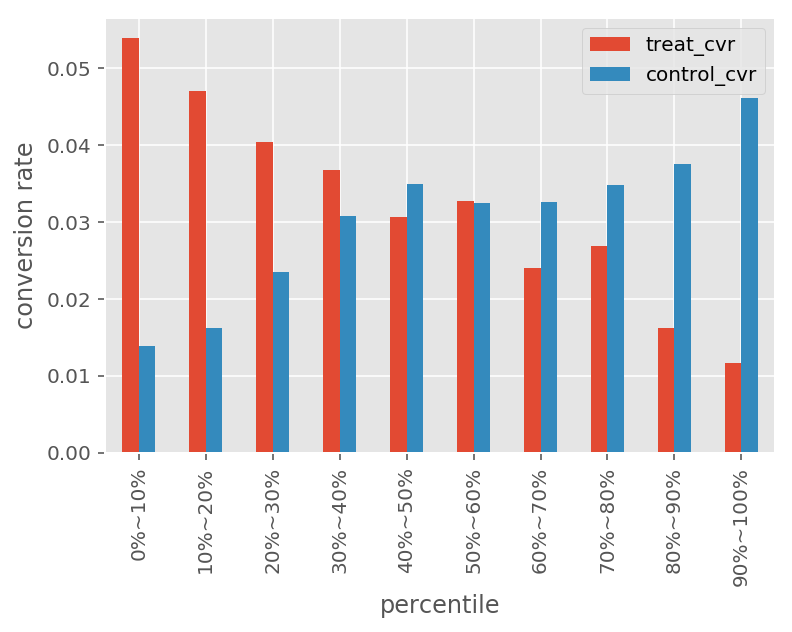

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
plt.style.use('ggplot')

%matplotlib inline 

# スコアが高い順に並べ替える
result = list(zip(test_is_cv_list, test_is_treat_list, score_list))
result.sort(key=itemgetter(2), reverse=True)

qdf = pd.DataFrame(columns=('treat_cvr', 'control_cvr'))

for n in range(10):
    start = int(n * len(result) / 10)
    end = int((n + 1) * len(result) / 10) - 1
    quantiled_result = result[start:end]

    treat_uu = list(map(lambda item:item[1], quantiled_result)).count(True)
    control_uu = list(map(lambda item:item[1], quantiled_result)).count(False)

    treat_cv = [item[0] for item in quantiled_result if item[1] == True].count(True)
    control_cv = [item[0] for item in quantiled_result if item[1] == False].count(True)

    treat_cvr = treat_cv / treat_uu
    control_cvr = control_cv / control_uu
    
    label = "{}%~{}%".format(n*10, (n+1)*10)
    qdf.loc[label] = [treat_cvr, control_cvr]

qdf.plot.bar()
plt.xlabel("percentile")
plt.ylabel("conversion rate")

図：10 パーセンタイルごとにコンバージョン率を可視化    
左のほうがスコアが高い。統制群/実験群がスコア。
treatは実験群。controlが統制群（何もしない）。    
スコアが高いほど実験群の コンバージョンレートが高く、統制群のコンバージョンレートが低くなることが確認    
Uplift Modelingがうまく動いている    
AUUCの値は大きければ大きいほど、Uplift Modelingの性 能が高い

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'conversion count')

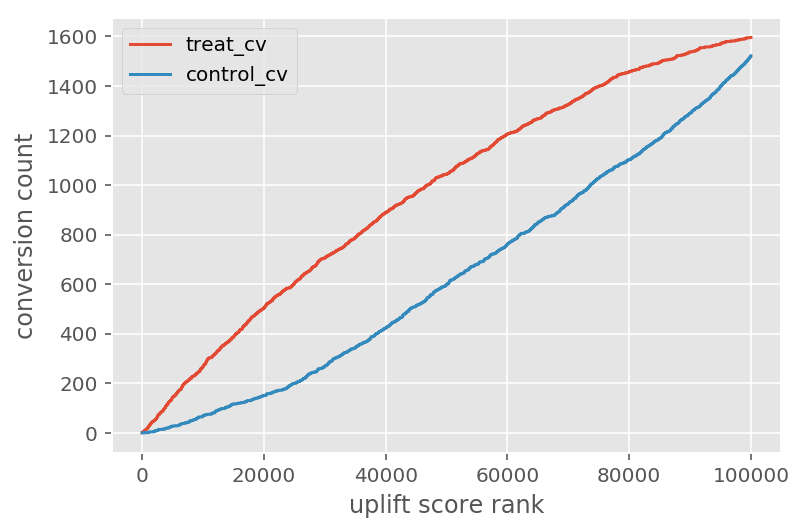

In [147]:
# スコア順に集計を行う
treat_uu = 0
control_uu = 0
treat_cv = 0
control_cv = 0
treat_cvr = 0.0
control_cvr = 0.0
lift = 0.0

stat_data = []

for is_cv, is_treat, score in result:
    if is_treat:
        treat_uu += 1
        if is_cv:
            treat_cv += 1
        treat_cvr = treat_cv / treat_uu
    else:
        control_uu += 1
        if is_cv:
            control_cv += 1
        control_cvr = control_cv / control_uu

    # コンバージョンレートの差に実験群の人数を掛けることでliftを算出
    lift = (treat_cvr - control_cvr) * treat_uu

    stat_data.append([is_cv, is_treat, score, treat_uu, control_uu, treat_cv, control_cv, treat_cvr, control_cvr, lift])

# 統計データを、DataFrameに変換する
df = pd.DataFrame(stat_data)
df.columns = ["is_cv", "is_treat", "score", "treat_uu", "control_uu", "treat_cv", "control_cv", "treat_cvr", "control_cvr", "lift"]

# ベースラインを書き加える
df["base_line"] = df.index * df["lift"][len(df.index) - 1] / len(df.index)

# 可視化を行う
df.plot(y=["treat_cv", "control_cv"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion count")


図：実験群と介入群のコンバージョン件数の比較

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'conversion rate')

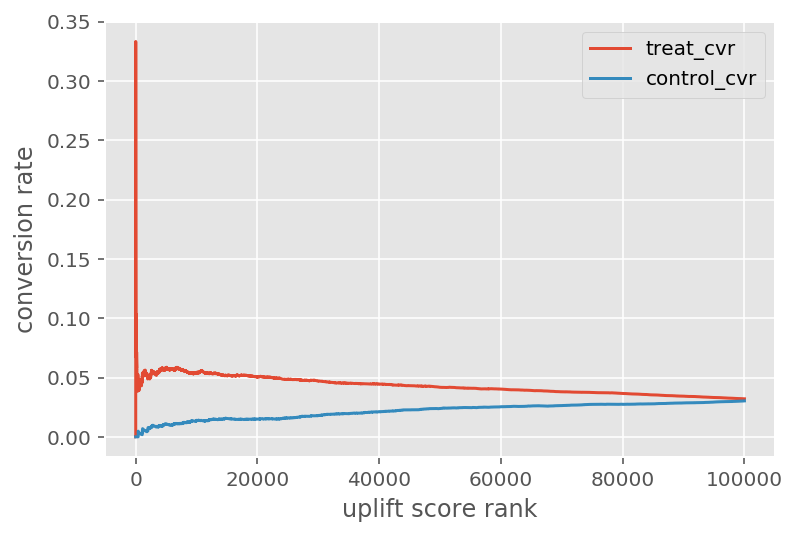

In [149]:
df.plot(y=["treat_cvr", "control_cvr"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion rate")



図：実験群と統制軍のコンバージョンレートの比較

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'conversion lift')

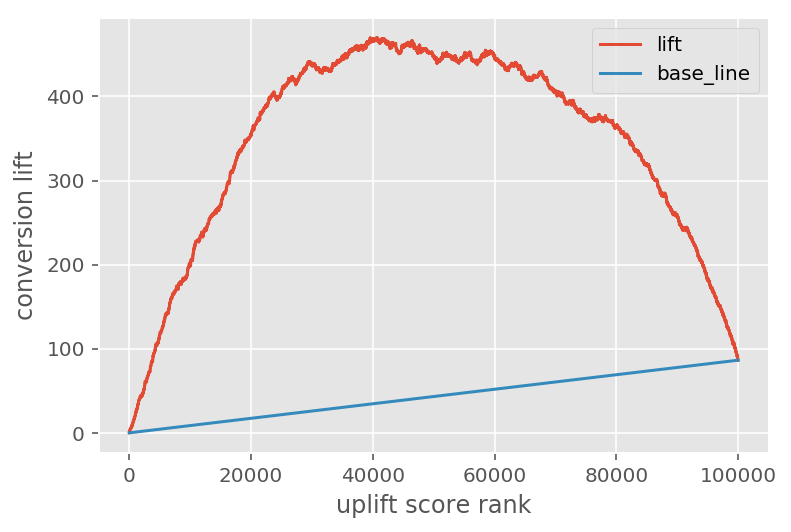

In [150]:

df.plot(y=["lift", "base_line"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion lift")


図：コンバージョンレートの差から、コンバージョン上昇件数を推定    

https://ysk24ok.github.io/2017/11/25/uplift_modeling.html    
Uplift Modelingの評価にはAUUCが用いられ、AUUCの算出にはliftという指標が用いられる。
liftとは、あるスコアを閾値としたとき、その閾値以上の顧客にのみ介入した場合と
全く介入をおこなわなかった場合とを比較してどれだけCV数が増えるかを表す値である。
横軸をスコアの降順に並べたときの順位とすると、liftは下の図で示すような曲線となり、この曲線とx軸で囲まれた面積が全く介入をおこなわない場合と比較したCV上昇数となる。

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'conversion lift')

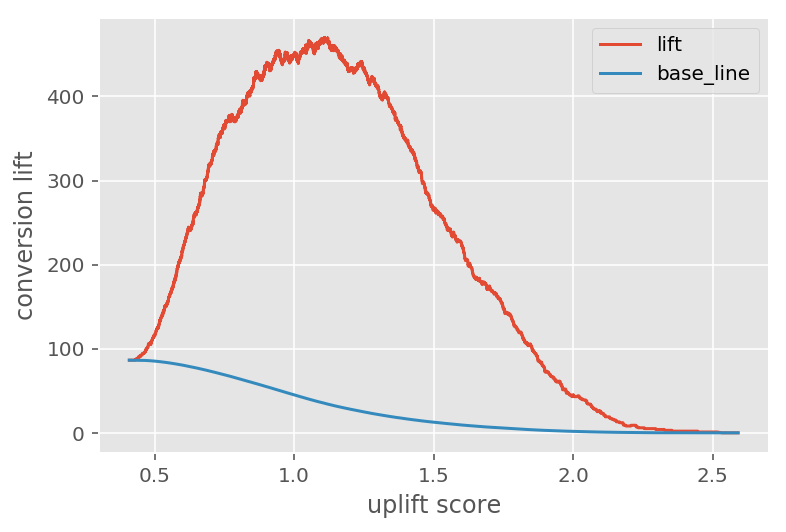

In [148]:
# df.plot(x="score", y=["treat_cv", "control_cv"], title="conversion count")
# df.plot(x="score", y=["treat_cvr", "control_cvr"], title="conversion rate")
df.plot(x="score", y=["lift", "base_line"])
plt.xlabel("uplift score")
plt.ylabel("conversion lift")



図：横軸をスコアにした Lift のグラフ

In [151]:
auuc = (df["lift"] - df["base_line"]).sum() / len(df["lift"])
print("AUUC:", auuc)

AUUC: 302.2463698475072
